#### THE SPARKS FOUNDATION INTERNSHIP :- Data Science and Business Analyst


#### Task1 : Prediction using supervised ml 
#### goal :- To predict percentage of a student based on total no of study hours


#### dataset link:- https://bit.ly/3cGyP8j

#### Author :- Umesh Inamdar






#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset

In [2]:
data=pd.read_csv('student_scores.csv')

#### Data Exploration

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#### Checking for any null values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

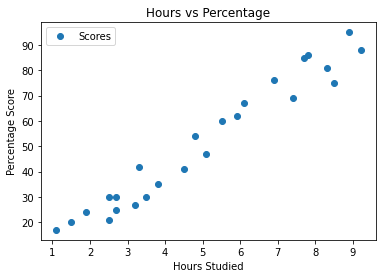

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

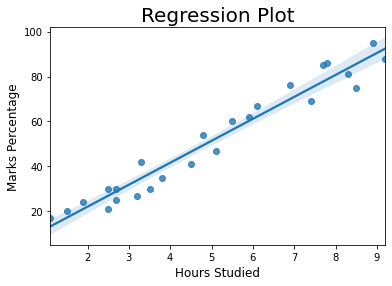

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It's confirmed that the variables are positively correlated

### Training the model

#### 1) Splitting the data

In [44]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3,random_state = 0)

#### 2) Fitting data into the model

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [46]:
pred = lr.predict(test_X)

In [47]:
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [48]:
print(lr.score(test_X, test_y)*100) 

95.68211104435257


#### 3) Predicting the Percentage based on hours of study

In [49]:

prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred]})
prediction

,Hours,Predicted Marks
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


#### 4) Comparison of predicted with actual percentage

In [50]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### Finding mean absolute error

In [51]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(test_y,pred))

Mean absolute error:  4.419727808027651


Small value of mean absolute error states that the chances of error is very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [52]:
hours = [9.25]
answer = lr.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.915


Answer :- If a student reads for 9.25 hrs/day, the student's score will be 92.915%. 


#### Thank you!!!